## Proyecto 1 - Etapa 1. Construcción de modelos de analítica de textos  

Sofia Vasquez - 202123910
Isabella Caputi - 202122075
Mario Velasquez - 202020502

Objetivo:
* Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.



## I. Descripción general Fondo de Poblaciones de las Naciones Unidas.
El 25 de septiembre de 2015, la Organización de las Naciones Unidas (ONU) adoptó la Agenda 2030 para el Desarrollo Sostenible, con el objetivo de erradicar la pobreza, garantizar el acceso a la salud y la educación, promover la igualdad de género y reducir el impacto ambiental, entre otras metas. Para ello, se establecieron 17 Objetivos de Desarrollo Sostenible (ODS)1 y 169 metas asociadas. En este marco, diversas entidades, como el Fondo de Población de las Naciones Unidas (UNFPA)2, participan en el seguimiento y evaluación de políticas públicas, utilizando herramientas de participación ciudadana para identificar problemáticas y evaluar soluciones en función de los ODS. Uno de los mayores desafíos en este proceso es el análisis de información textual proveniente de distintas fuentes vinculadas a la planificación participativa territorial. Esta tarea demanda recursos significativos y expertos capaces de relacionar los contenidos con los ODS. Contar con este conocimiento permitiría tomar decisiones más informadas basadas en la opinión ciudadana, orientando las políticas públicas hacia el cumplimiento de la Agenda 2030. El UNFPA busca desarrollar un proyecto conjunto con ustedes, cuyo objetivo principal es vincular de forma automática las opiniones de la ciudadanía con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4. Para ello, se deberá aplicar una metodología de desarrollo de aplicaciones analíticas que permita crear un modelo capaz de analizar y clasificar dichas opiniones. Este modelo deberá integrarse en una aplicación web o móvil, desde la cual podrá ser utilizado y reentrenado continuamente a partir de textos en lenguaje natural.

### 1. Instalación e importanción de librerías.


In [ ]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [ ]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [ ]:
!pip install --upgrade joblib loky

In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have

### 2. Perfilamiento y entendimiento de los datos



#### Realizamos la lectura de los datos.

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_excel('/content/Datos_proyecto.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [ ]:
data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


Aca podemos ver los datos que tenemos para realizar el proyecto.

In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


Queremos ver la informacion de los datos, en este caso podemos ver que tanto en la columna texto como labels no hay nulos y los tipos son object y int respectivamente. La variables textos es la que nos va a permitir predecir que label (cual ODN va a escoger).

#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.



In [ ]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Media'] = [[np.mean([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

In [ ]:
textos

,textos,labels,Conteo,Max,Min,Media
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,6.354167
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,6.180556
2,"Además, la formación de especialistas en medic...",3,659,15,1,6.096774
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,5.366972
4,Este grupo se centró en las personas que padec...,3,608,14,0,5.410526
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,5.566372
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,5.376471
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,4.515625
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,4.852713


En este bloque, generamos features descriptivas de los textos:

Conteo: tamaño total del texto (caracteres).

Max: longitud de la palabra más larga.

Min: longitud de la palabra más corta.

Media: promedio de longitudes de palabras.

Ahora, vamos a realizar un resporte de datos. Importamos Pandas Profiling para obtener un reporte de los datos

In [ ]:
!pip install -U ydata-profiling

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(data_t)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

El dataset está compuesto por 2.424 opiniones ciudadanas únicas en la columna textos y una variable categórica labels que identifica el ODS asociado a cada opinión (1: Fin de la pobreza, 3: Salud y bienestar, 4: Educación de calidad). No se encontraron valores nulos ni duplicados, lo que garantiza la calidad de la información. La distribución de clases muestra un leve desbalance, con 505 registros para ODS1, 894 para ODS3 y 1.025 para ODS4, lo cual se tendrá en cuenta en la fase de modelado. El análisis refleja que las opiniones presentan longitudes variadas y contienen palabras frecuentes como “salud”, “pobreza” y “educación”, junto con numerosas stopwords que deberán eliminarse durante el preprocesamiento. En general, los datos están completos y en buen estado para continuar con la etapa de preparación y construcción del modelo de clasificación.

### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.



#### **3.1 Limpieza de los datos**
Para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

<span style="color:red"> En este punto te invitamos a completar las funciones faltantes, como convertir los elementos de una lista a minúsculas (to_lowercase) y para eliminar los stowords (remove_stopwords) <span>




In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("spanish"))
def remove_stopwords(words):
    return [w for w in words if w not in stop_words]

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
            if word is not None:
                new_words.append(word.lower())
    return new_words
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    print(words)
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
            print("if " + new_word)
        else:
            new_words.append(word)
    return new_words



def preprocessing(words):
    words = to_lowercase(words)
    words = remove_stopwords(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    return words


#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [ ]:
data_t['textos'] = data_t['textos'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()



,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


Luego borramos los vacios:

In [ ]:
data_t['words'].dropna()

,words
0,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"[Además, ,, la, formación, de, especialistas, ..."
3,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,"[Este, grupo, se, centró, en, las, personas, q..."
...,...
2419,"[La, tutoría, de, carrera, está, diseñada, par..."
2420,"[Fuente, :, Ministerio, de, Educación, ., Las,..."
2421,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner..."
2422,"[Sin, embargo, ,, estas, fallas, del, mercado,..."


In [ ]:
data_t.shape

(2424, 3)

In [ ]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2424 entries, 0 to 2423
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
2424 non-null   object
dtypes: object(1)
memory usage: 19.1+ KB


Y llamamos a las funciones anteriores para limpizar los datos:

In [ ]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

Streaming output truncated to the last 5000 lines.
['colegios', 'académicos', ',', 'colegios', 'comunitarios', 'vocacionales', 'dos', 'años', '.', 'sistema', 'facilitaría', 'fácil', 'transición', 'estudiantes', 'nivel', '.', 'informe', 'recomendaba', 'mejorar', 'autoridad', 'toma', 'decisiones', 'rendición', 'cuentas', 'colegios', 'existentes', ',', 'principalmente', 'áreas', 'relacionadas', 'necesidades', 'regionales', '.', 'informe', 'prevé', 'nuevo', 'papel', 'aprendizaje', 'permanente', 'instituciones', 'educación', 'superior', '.', 'educación', 'terciaria', 'israel', 'abarcaría', 'estudios', 'postsecundarios', '(', 'grados', 'asociados', ')', ',', 'estudios', 'académicos', '(', 'colegios', 'universidades', ')', 'aprendizaje', 'permanente', '.']
['ejercicios', 'modelización', 'suelen', 'seguir', 'patrón', 'presentación', 'escenarios', '``', 'sida', "''", '``', 'sida', "''", '.', 'ejemplo', 'modelo', 'ing', 'barings', ',', 'ampliamente', 'difundido', ',', 'elaborado', 'conferencia',

,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, pequenos, bebes, ninos, pequenos, capa..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


##### **3.3 Selección de campos**
Convertimos las listas de palabras de la columna words en frases de texto plano, uniendo todos los tokens con espacios.

In [ ]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,`` Aprendizaje '' y `` educación '' se conside...,"[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,Para los niños más pequeños ( bebés y niños pe...,"[ninos, pequenos, bebes, ninos, pequenos, capa..."
2,"Además, la formación de especialistas en medic...",3,"Además , la formación de especialistas en medi...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,En los países de la OCDE se tiende a pasar de ...,"[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,Este grupo se centró en las personas que padec...,"[grupo, centro, personas, padecen, trastornos,..."
...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,La tutoría de carrera está diseñada para apoya...,"[tutoria, carrera, disenada, apoyar, estudiant..."
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,Fuente : Ministerio de Educación . Las Tasas I...,"[fuente, ministerio, educacion, tasas, interna..."
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,"Y desde 2010 , el PNUD ha sido pionero en la p...","[two thousand and ten, pnud, sido, pionero, pu..."
2422,"Sin embargo, estas fallas del mercado implican...",3,"Sin embargo , estas fallas del mercado implica...","[embargo, fallas, mercado, implican, competenc..."


Aquí seleccionamos la columna labels como nuestra variable target, esta es la que vamos a predecir.

Como tenemos dos columnas, words1 (tokens limpios) y words (texto plano). Decidimos crear una nueva variable, clean_text que es un string plano para vectorizadores y para que no se confunda con words.

In [ ]:
data_t['clean_text'] = data_t['words1'].apply(lambda x: ' '.join(map(str, x)))
X_data, y_data = data_t['clean_text'], data_t['labels']


Primero, se transforma el texto con una transformación binaria 1 a 1.

In [ ]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(2424, 14861)


array([0, 0, 0, ..., 0, 0, 0])

También, se puede realizar el conteo de las palabras presentes.

In [ ]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(2424, 14861)


array([0, 0, 0, ..., 0, 0, 0])

En este punto vamos completar la matriz con esta estrategia de TF_IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(data_t['clean_text'])



In [ ]:
import pandas as pd

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

print(tfidf_df[1:])



       05   06   07   10  1000   11   12  125   13   14  ...   yo  you  \
1     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5     0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
2419  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2420  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2421  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2422  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2423  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

      zelanda  zero  zero estudiantes  zero habitantes  zona  zonas  \
1         0.0   0.0               0.0   

Anteriormente, podemos ver la tabla a la que se lega de nuemros TF-IDF.

## 4. Creación y Aplicación del modelo
Una vez se tiene la representación vectorial de cada uno de los textos se debe crear un modelo que permita clasificarlos en las categorias correspondientes. Para esto se pueden usar cualquiera de las representaciones anteriormente creadas.

Paso 1: separar en train/test, se usa el 30% de los datos para test.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

Paso 2: Creamos un vectorizer que es un pipeline que integra en un solo flujo todas las etapas de preprocesamiento de texto necesarias para entrenar y evaluar un modelo de Machine Learning. Su funcionamiento es el siguiente:

1. Limpieza de los textos

* Convierte todo a minúsculas.

* Elimina caracteres no ASCII.

* Sustituye números por su representación en palabras.

* Quita signos de puntuación.

* Elimina stopwords en español (palabras muy frecuentes sin valor semántico, como “de”, “la”, “que”).

2. Tokenización y reconstrucción

* Divide el texto en palabras (tokens).

* Aplica la limpieza a cada token.

* Une de nuevo el resultado en un texto plano limpio.

3. Vectorización con TF-IDF

* Transforma cada documento en un vector numérico.

* El valor de cada posición refleja la importancia de una palabra o bigrama dentro del documento y en el conjunto completo de textos.


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re, unicodedata
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Stopwords y números
stop_words = set(stopwords.words("spanish"))
p = inflect.engine()

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=5000, ngram_range=(1,2)):
        self.max_features = max_features
        self.ngram_range = ngram_range
        # inicializar vectorizador
        self.vectorizer = TfidfVectorizer(max_features=self.max_features,
                                          ngram_range=self.ngram_range)

    def remove_stopwords(self, words):
        return [w for w in words if w not in stop_words]

    def to_lowercase(self, words):
        return [w.lower() for w in words if w is not None]

    def remove_punctuation(self, words):
        return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8','ignore')
            if new_word != "":
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def preprocessing(self, text):
        if text is None or str(text).strip() == "" or str(text).lower() == "nan":
            return ""

        words = word_tokenize(str(text))


        words = self.to_lowercase(words)
        words = self.remove_stopwords(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)

        return " ".join(words)  # devolvemos texto plano listo para TF-IDF

    def fit(self, X, y=None):
        cleaned = [self.preprocessing(text) for text in X]
        self.vectorizer = TfidfVectorizer(max_features=self.max_features,
                                          ngram_range=self.ngram_range)
        self.vectorizer.fit(cleaned)
        return self

    def transform(self, X, y=None):
        cleaned = [self.preprocessing(text) for text in X]
        return self.vectorizer.transform(cleaned)



#Modelo 1: Regresion Logistica
Sofia Vasquez: **Regresión Logística multinomial**. Es un modelo supervisado de clasificación que, combinado con la representación TF-IDF de los textos, permite predecir de forma automática a qué ODS pertenece cada opinión.

Paso 3: Contruccion del pipeline.
Este pipeline constituye un flujo completo de procesamiento y clasificación de texto. A partir de un texto crudo, realiza automáticamente la limpieza con la vectorización que usa TF-IDF y realiza una predicción mediante Regresión Logística.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('vectorizer', TextPreprocessor(max_features=5000, ngram_range=(1,2))),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])


In [ ]:
print(y_data.value_counts())


labels
4    1025
3     894
1     505
Name: count, dtype: int64


Paso 4: Entrenamos el modelo, tomamos los textos de entrenamiento (X_train)y los vectorizamos con TF-IDF. Ajustamos los coeficientes de la regresión logística para predecir y_train.

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TextPreprocessor()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Paso 5: Usamos el modelo entrenado para predecir las etiquetas del conjunto de prueba.

In [ ]:
y_pred = pipeline.predict(X_test)

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       152
           3       0.96      0.96      0.96       268
           4       0.97      0.98      0.98       308

    accuracy                           0.96       728
   macro avg       0.96      0.95      0.96       728
weighted avg       0.96      0.96      0.96       728



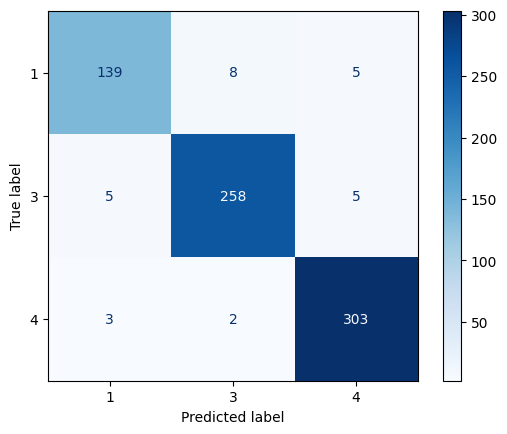

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reporte de métricas (precisión, recall, F1 por clase)
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_data))
disp.plot(cmap="Blues", values_format="d")
plt.show()


El modelo de **Regresión Logística Multinomial**, entrenado con representación TF-IDF de los textos, alcanzó un desempeño sobresaliente en la tarea de clasificar opiniones ciudadanas dentro de los ODS 1, 3 y 4. Los resultados muestran un accuracy global del 96%, con métricas de precisión, recall y F1-score muy equilibradas entre las tres clases.

Esto indica que:

* El modelo generaliza bien y no favorece en exceso a una sola categoría.

* La combinación de TF-IDF + Regresión Logística resulta ser una solución simple, eficiente e interpretable para problemas de clasificación de texto.

* La alta precisión y recall sugieren que el modelo es confiable tanto para identificar correctamente las opiniones (bajo nivel de falsos positivos) como para no dejar de clasificar opiniones relevantes (bajo nivel de falsos negativos).

#Modelo 2: Random Forest
Isabella Caputi: **Modelo de Random Forest**.

El modelo de Random Forest es un algoritmo de aprendizaje supervisado que contiene muchos árboles de decisión, donde cada árbol se entrena con una muestra distinta de los datos y seleccionando aleatoriamente un subconjunto de características en cada división. Este modelo reduce el riesgo de sobreajuste propio de un solo árbol, logrando predicciones más estables y precisas. En el contexto de la clasificación de opiniones ciudadanas frente a los ODS, este modelo resulta adecuado porque maneja bien datos de texto vectorizados, es robusto ante ruido y desbalance en las clases, y permite identificar patrones relevantes en el lenguaje natural que asocian cada opinión con uno de los 3 ODS, aportando así un soporte confiable para la toma de decisiones en políticas públicas.

Primero, definimos el pipeline a utilizar. Este primero vectoriza los textos con TF-IDF usando uni- y bigramas (hasta 5000 features), luego aplica un Random Forest con 200 árboles, profundidad ilimitada y ajuste de pesos para manejar el desbalance de clases. Asi, se entrena y predece de forma sencilla con los datos de opiniones sobre los ODS.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Definimos el pipeline que vamos a utilizar con Random Forest
pipeline = Pipeline([
    ('vectorizer', TextPreprocessor(max_features=5000, ngram_range=(1,2))),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight="balanced",
        random_state=42
    ))
])

Luego, realizamos una búsqueda aleatoria de hiperparámetros con RandomizedSearchCV, donde se seleccionan aleatoriamente 20 configuraciones a partir del espacio definido en param_grid. Cada combinación se evalúa con validación cruzada con 3 particiones usando como métrica a optimizar el F1 macro, lo que garantiza balancear el desempeño entre todas las clases.

Nota: Se utilizó F1-macro como métrica de optimización porque el proyecto busca un desempeño balanceado entre las tres clases de ODS (1, 3 y 4), sin favorecer a la clase mayoritaria. A diferencia de la exactitud, el F1-macro evalúa precisión y recall de cada clase por igual, lo que resulta más adecuado en un problema de clasificación de texto donde puede existir desbalance en las opiniones ciudadanas.


En el caso del grid de parametros las variables significan lo siguiente:
n_estimators: número de árboles en el bosque.

max_depth: controla la profundidad máxima de cada árbol, evitando sobreajuste y mejorando la generalización.

min_samples_split: número mínimo de muestras necesarias para dividir un nodo.

min_samples_leaf: número mínimo de muestras en una hoja, suavizando el modelo.

max_features: número de características consideradas en cada división. -->sqrt": usa la raíz cuadrada del total de características. "log2": usa el logaritmo en base 2 del total. Da mas aleatoriedad, y mejorando el poder de generalización.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "model__n_estimators": [100, 200, 500],
    "model__max_depth": [None, 10, 20, 40],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}


search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring="f1_macro",
    n_jobs=1,
    verbose=2,
    random_state=42
)

Luego, utilizamos el método fit para entrenar el modelo con el conjunto train y prueba los modelos, y search.best_params_ devuelve la configuración de hiperparámetros que obtuvo el mejor rendimiento.

In [ ]:
search.fit(X_train, y_train)
print("Mejores parámetros:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=   3.1s
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=   2.2s
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100; total time=   2.0s
[CV] END model__max_depth=40, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100; total time=   2.0s
[CV] E

Luego, se extrae el mejor modelo encontrado por RandomizedSearchCV (best_estimator_) y lo usa para predecir las etiquetas del conjunto de prueba (X_test), generando así las predicciones más óptimas según la búsqueda de hiperparámetros.

In [ ]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

Por ultimo realizamos un reporte de las metricas obtenidas con el modelo, al igual que un mapa de calor para interpretar los resultados.

              precision    recall  f1-score   support

           1       0.94      0.92      0.93       152
           3       0.96      0.97      0.96       268
           4       0.97      0.98      0.98       308

    accuracy                           0.96       728
   macro avg       0.96      0.96      0.96       728
weighted avg       0.96      0.96      0.96       728



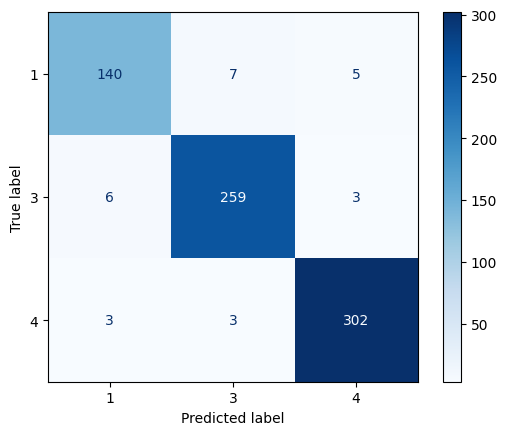

In [ ]:
#Reporte de métricas (precisión, recall, F1-score)
print(classification_report(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_data))
disp.plot(cmap="Blues", values_format="d")
plt.show()

A partir de estos resultados, podemos observar que el modelo de Random Forest optimizado alcanzó un desempeño alto en la clasificación de los ODS, con una **exactitud global del 0.96**, por lo cual se concluye que la mayoría de las opiniones fueron clasificadas correctamente. El ODS 1 (Fin de la pobreza) tiene el **F1-score más bajo (0.93)**, lo que indica que aún existen errores al distinguirlo de los ODS 3 y 4, aunque el rendimiento sigue siendo satisfactorio. Por su parte, los ODS 3 (Salud y bienestar) y 4 (Educación de calidad) tienen **F1-scores de 0.97 y 0.98** respectivamente, dando un excelente equilibrio entre precisión y recall. La matriz de confusión respalda estos resultados al mostrar que la mayoría de los textos son clasificados en su categoría correcta, con muy pocos errores entre clases. En conclusión, el modelo presenta un rendimiento robusto y balanceado, con una ligera oportunidad de mejora en la identificación de opiniones relacionadas con ODS 1, posiblemente asociada a la menor cantidad de ejemplos de esta clase.

# Modelo 3: Bayes Ingenuo

Mario Velásquez: Modelo de Bayes Ingenuo


Aquí añadimos un clasificador de texto con Naive Bayes (ComplementNB), adecuado para
representaciones TF-IDF y posibles desbalances entre ODS 1, 3 y 4. Se hará búsqueda
de hiperparámetros con CV optimizando F1-macro (criterio alineado con el enunciado).


**Reporte de métricas y visualización**
En consonancia con las secciones 3 y 4 del enunciado, evaluamos el modelo en el set de
prueba (accuracy, F1-macro) y graficamos la matriz de confusión para interpretar errores
entre ODS 1, 3 y 4.


In [ ]:
# Definición del pipeline NB + búsqueda de hiperparámetros (F1-macro)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB

nb_pipe = Pipeline([
    ('vectorizer', TextPreprocessor(max_features=10000, ngram_range=(1,2))),
    ('model', ComplementNB(norm=True))
])

param_grid = {
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'vectorizer__max_features': [5000, 6000, 7000, 8000, 9000, 10000],
    'model__alpha': [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0],
    'model__norm': [True, False]
}

gs_nb = GridSearchCV(
    estimator=nb_pipe,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=1,
    verbose=1
)

gs_nb.fit(X_train, y_train)
best_nb = gs_nb.best_estimator_
print("Mejores parámetros NB:", gs_nb.best_params_)


Fitting 3 folds for each of 168 candidates, totalling 504 fits
Mejores parámetros NB: {'model__alpha': 0.5, 'model__norm': True, 'vectorizer__max_features': 9000, 'vectorizer__ngram_range': (1, 2)}


Accuracy: 0.956
F1-macro: 0.9504

Classification report:
               precision    recall  f1-score   support

           1     0.9388    0.9079    0.9231       152
           3     0.9659    0.9515    0.9586       268
           4     0.9558    0.9838    0.9696       308

    accuracy                         0.9560       728
   macro avg     0.9535    0.9477    0.9504       728
weighted avg     0.9560    0.9560    0.9559       728



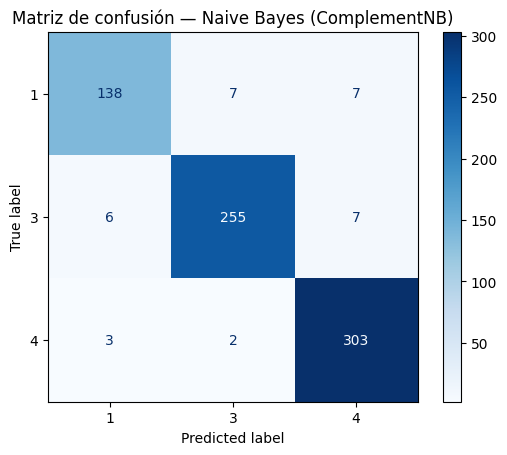

In [ ]:
# Métricas en test + matriz de confusión
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Se asume que X_test, y_test, y_data ya existen en el notebook
y_pred_nb = best_nb.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 4))
print("F1-macro:", round(f1_score(y_test, y_pred_nb, average='macro'), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred_nb, digits=4))

cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_data)).plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión — Naive Bayes (ComplementNB)")
plt.show()


**Resultados y evaluación (test)**

Los resultados muestran que el modelo es confiable para clasificar textos de salud (ODS 3) y educación (ODS 4), pero que conviene reforzar la clasificación para el ODS 1 (pobreza). Sin embargo, este modelo es más un baseline para evaluar los modelos 1 y 2 mostrados anteriormente. En ese orden de ideas, dado que los F1 de los modelos 1 y 2 fueron mayores a este baseline se puede decir que son unos modelos robustos.


#5. Análisis de Resultados
## 5.a Resultados y aporte al negocio (UNFPA/ODS)
El modelo con mayor nivel de F1 es **Random Forest**, el cual logra:
- Accuracy 0.96 y F1-macro 0.96 en test.
- Por clase: ODS 1 F1=0.93, ODS 3 F1=0.96, ODS 4 F1=0.98.  

Analisis de funcionalidad con respecto al proyecto con UNFPA: El desempeño es alto y balanceado, con lo que el modelo puede priorizar textos de Salud (ODS 3) y Educación (ODS 4) con gran confiabilidad. ODS 1 (Pobreza) funciona bien pero es la clase a reforzar (dado que tienen un menor recall relativo), útil para orientar campañas de curaduría y etiquetado adicional.

Lo anterior se evidencia en las siguientes métricas.


Accuracy: 0.9629
F1-macro: 0.9574

Classification report:
               precision    recall  f1-score   support

           1     0.9396    0.9211    0.9302       152
           3     0.9628    0.9664    0.9646       268
           4     0.9742    0.9805    0.9773       308

    accuracy                         0.9629       728
   macro avg     0.9589    0.9560    0.9574       728
weighted avg     0.9628    0.9629    0.9628       728



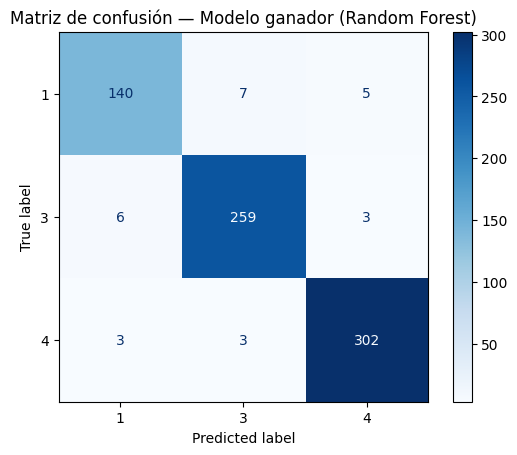

In [ ]:
# Resumen de métricas y matriz de confusión para el modelo ganador: Random Forest.
y_pred_rf = best_model.predict(X_test)

acc  = accuracy_score(y_test, y_pred_rf)
f1m  = f1_score(y_test, y_pred_rf, average='macro')
print(f"Accuracy: {acc:.4f}")
print(f"F1-macro: {f1m:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred_rf, digits=4))

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_data)).plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión — Modelo ganador (Random Forest)")
plt.show()


**Descripción de los resultados y aporte al negocio**

El modelo seleccionado como ganador fue Random Forest, alcanzando un accuracy de 96.3% y un F1-macro de 95.7% sobre el conjunto de prueba. Estos resultados evidencian un desempeño altamente confiable y balanceado en la clasificación de las opiniones ciudadanas respecto a los ODS priorizados (1, 3 y 4).

Por clase:

*ODS 1 (Fin de la pobreza)*: F1-score de 0.93. Aunque presenta buena precisión (0.94), su recall (0.92) es ligeramente inferior a las demás clases, lo que indica que algunos textos relacionados con pobreza se confunden con las otras categorías.

*ODS 3 (Salud y bienestar)*: F1-score de 0.96, con un equilibrio entre precisión (0.96) y recall (0.97), lo que demuestra una gran capacidad del modelo para identificar de forma consistente los textos relacionados con salud.

*ODS 4 (Educación de calidad)*: F1-score de 0.98, el más alto, con recall de 0.98, lo que significa que casi todos los textos de educación fueron correctamente clasificados.

La matriz de confusión, nos ayuda a reforzar este análisis, mostrando que los errores de clasificación se concentran en ODS1, mientras que ODS3 y ODS4 presentan muy pocas confusiones.

**Aporte al negocio (UNFPA/ODS):**

El modelo es lo suficientemente robusto para apoyar a la organización en la curaduría y clasificación automática de opiniones ciudadanas. Esto permite:

- Reducir la carga manual de análisis de grandes volúmenes de texto.

- Priorizar recursos y campañas en temas de salud y educación, donde el modelo ofrece gran confiabilidad.

- Identificar áreas de mejora en la categoría de pobreza (ODS1), sugiriendo la necesidad de ampliar el dataset o aplicar técnicas de balanceo para aumentar la sensibilidad del modelo.

En conclusión, los resultados confirman que la analítica de textos con Random Forest aporta una herramienta estratégica para transformar la voz ciudadana en insumos accionables para el diseño de políticas públicas alineadas con la Agenda 2030.

## 5.b Palabras/términos clave por ODS y estrategias
A fin de explicar el modelo al UNFPA y diseñar acciones, generamos dos vistas complementarias usando la misma vectorización del pipeline con mejores métricas: Random Forest:

1) **Relevancia por clase (one-vs-rest) con chi-cuadrado** → identifica tokens fuertemente asociados a cada ODS (1, 3, 4). Esto se puede usar para glosarios/guías de redacción, sinónimos y variantes regionales.

2) **Diagnóstico de confusiones por clase (aciertos vs. errores)** → compara el TF-IDF promedio en **aciertos** vs. **errores** para cada ODS. Con esto se puede detectar vocabulario que genera confusión en el modelo para futuras mejoras.

### 5.b.1 Top-10 por ODS (relevancia chi², one-vs-rest)
Identificamos los 10 tokens más asociados a cada clase (1, 3, 4) con chi-cuadrado. Útil para glosarios y guías de redacción.


In [ ]:
# Top-10 por clase con chi² (one-vs-rest)
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

k = 10  # top-10 por clase

# Vectorizador del pipeline ganador
vec = best_model.named_steps['vectorizer'].vectorizer
feature_names = np.array(vec.get_feature_names_out())

# TF-IDF del train con el MISMO preprocesamiento
Xtr_tfidf = best_model.named_steps['vectorizer'].transform(X_train)
classes = np.sort(y_train.unique())

rows = []
for c in classes:
    y_bin = (y_train == c).astype(int)
    chi2_scores, _ = chi2(Xtr_tfidf, y_bin)
    order = np.argsort(chi2_scores)[::-1][:k]
    for rank, idx in enumerate(order, 1):
        rows.append({"clase": int(c), "rank": rank, "token": feature_names[idx], "chi2": float(chi2_scores[idx])})

df_top10_chi2 = pd.DataFrame(rows)

# Exportación combinada y por clase
df_top10_chi2.to_csv("top_tokens_rf_chi2_top10_por_clase.csv", index=False)
for c in classes:
    df_top10_chi2[df_top10_chi2["clase"] == c].to_csv(f"top_tokens_rf_chi2_top10_clase_{int(c)}.csv", index=False)

print("Archivos generados: top_tokens_rf_chi2_top10_por_clase.csv y uno por clase.")
df_top10_chi2


Archivos generados: top_tokens_rf_chi2_top10_por_clase.csv y uno por clase.


,clase,rank,token,chi2
0,1,1,pobreza,161.560422
1,1,2,pobres,52.827436
2,1,3,pobreza infantil,28.633107
3,1,4,hogares,27.819880
4,1,5,ingresos,27.741084
5,1,6,privacion,24.285019
6,1,7,umbral,19.857953
7,1,8,extrema,18.517204
8,1,9,linea pobreza,18.462643
9,1,10,tasa pobreza,17.441786


### Análisis de tokens más asociados (chi², one-vs-rest)

ODS 1 (Pobreza)  
Los términos que aparecen arriba encajan muy bien con el dominio: pobreza, pobres, pobreza infantil, hogares, ingresos, privación, umbral, extrema, línea y tasa de pobreza. Esto muestra que el modelo capturó el léxico técnico de pobreza y que, cuando estos conceptos están presentes, la decisión hacia ODS 1 es firme. El posible riesgo está en textos que hablen del tema usando perífrasis o eufemismos sin esas palabras núcleo, donde el modelo podría perder algo de recall.

ODS 3 (Salud y bienestar)  
Aparecen señales claras del ámbito sanitario: salud, atención, pacientes, médicos, atención primaria, salud mental, enfermedades. Llama la atención que también surgen pobreza y educación. Esto sugiere textos intersectoriales donde se habla de salud junto con determinantes sociales o contexto educativo. Si el texto incluye términos de varios ODS sin suficiente contexto sanitario, la clasificación puede competir con ODS 1 u ODS 4.

ODS 4 (Educación de calidad)  
Los tokens son los esperables: estudiantes, escuelas, educación, aprendizaje, docentes, alumnos, escuela. También aparecen pobreza y salud, lo que refleja que muchos textos educativos mencionan condiciones sociales y bienestar. Cuando el marco es educativo, la presencia de vocabulario de aula, evaluación, habilidades y docentes ayuda a mantener la decisión en ODS 4.


### 5.b.2 Top-10 de términos “conflictivos” por ODS (aciertos vs. errores)
Comparamos TF-IDF promedio en **aciertos** vs **errores** por clase:
- *errores>aciertos*: tokens más presentes cuando la clase se confundió (priorizar aumentación).
- *aciertos>errores*: tokens más presentes cuando la clase fue bien detectada (mantener cobertura).


In [ ]:
# Top-10 por clase en errores>aciertos y aciertos>errores
import numpy as np
import pandas as pd

k = 10  # top-10 por vista
y_pred_rf = best_model.predict(X_test)
classes = np.sort(y_train.unique())

X_test_series = pd.Series(X_test)
vec_step = best_model.named_steps['vectorizer']
vec = vec_step.vectorizer
feature_names = np.array(vec.get_feature_names_out())

rows = []
for c in classes:
    mask_true = (y_test.values == c)
    mask_pred = (y_pred_rf == c)
    mask_err  = mask_true & (~mask_pred)   # verdaderos c mal clasificados
    mask_ok   = mask_true & mask_pred      # verdaderos c bien clasificados

    X_err = vec_step.transform(X_test_series[mask_err])
    X_ok  = vec_step.transform(X_test_series[mask_ok])

    mean_err = np.asarray(X_err.mean(axis=0)).ravel() if X_err.shape[0] > 0 else np.zeros(len(feature_names))
    mean_ok  = np.asarray(X_ok .mean(axis=0)).ravel() if X_ok .shape[0] > 0 else np.zeros(len(feature_names))

    diff_err_ok = mean_err - mean_ok   # errores > aciertos
    diff_ok_err = mean_ok  - mean_err  # aciertos > errores

    # Top-10 errores>aciertos
    idx_e = np.argsort(diff_err_ok)[::-1][:k]
    for rank, i in enumerate(idx_e, 1):
        rows.append({"clase": int(c), "tipo": "errores>aciertos", "rank": rank,
                     "token": feature_names[i], "delta_mean_tfidf": float(diff_err_ok[i])})

    # Top-10 aciertos>errores
    idx_o = np.argsort(diff_ok_err)[::-1][:k]
    for rank, i in enumerate(idx_o, 1):
        rows.append({"clase": int(c), "tipo": "aciertos>errores", "rank": rank,
                     "token": feature_names[i], "delta_mean_tfidf": float(diff_ok_err[i])})

df_conflictivos_top10 = pd.DataFrame(rows)

# Exportación combinada y por clase
df_conflictivos_top10.to_csv("tokens_conflictivos_top10_por_clase.csv", index=False)
for c in classes:
    df_conflictivos_top10[df_conflictivos_top10["clase"] == c].to_csv(
        f"tokens_conflictivos_top10_clase_{int(c)}.csv", index=False
    )

print("Archivos generados: tokens_conflictivos_top10_por_clase.csv y uno por clase.")
df_conflictivos_top10


Archivos generados: tokens_conflictivos_top10_por_clase.csv y uno por clase.


,clase,tipo,rank,token,delta_mean_tfidf
0,1,errores>aciertos,1,meta,0.060418
1,1,errores>aciertos,2,servicios,0.046300
2,1,errores>aciertos,3,ipm,0.044059
3,1,errores>aciertos,4,comunidades,0.036824
4,1,errores>aciertos,5,suficiente,0.035153
5,1,errores>aciertos,6,cuanto,0.034052
6,1,errores>aciertos,7,regiones,0.033273
7,1,errores>aciertos,8,ocupacion,0.031171
8,1,errores>aciertos,9,ods,0.030836
9,1,errores>aciertos,10,estrategia,0.030370


### Análisis de tokens “conflictivos” (aciertos vs. errores por clase)

ODS 1 (Pobreza)  
En los errores destacan meta, servicios, IPM, comunidades, suficiente, cuánto, regiones, ocupación, ODS, estrategia. Varios son términos de política pública generales y no anclan por sí solos la clase. IPM es propio de pobreza, pero sin co-ocurrencias claras con ingresos, hogares o privación puede diluirse. En los aciertos predominan pobreza, pobres, ingresos, privación, hogares, hogar y pobreza infantil, es decir, el léxico más canónico. Esto confirma que el modelo acierta cuando el texto nombra con claridad los conceptos centrales y falla más cuando la formulación es genérica. Ayuda añadir co-ocurrencias guía como IPM junto con hogares o ingresos, y depurar tokens en inglés que no aportan.

ODS 3 (Salud y bienestar)  
Entre los errores aparecen riqueza, quintil, embarazo, especialidades, licencias, pobres, además de inglés residual como and o thousand. Hay mezcla de socioeconómico con clínico y algo de ruido. En los aciertos dominan salud, atención, servicios, pacientes, calidad, atención primaria, médicos, sanitaria, enfermedades. El modelo funciona muy bien cuando el texto tiene un marco clínico u organizacional claro. Para reducir errores, conviene reforzar frases sanitarias que fijen el contexto (control prenatal, redes integradas, urgencias, consulta externa) y curar ejemplos ambiguos donde coexisten pobreza y salud.

ODS 4 (Educación de calidad)  
En los errores aparecen artículo, acuerdos, además, aprendices, fiscales, commonwealth, seis, sen, naciones unidas. Muchos son institucionales o legales y no siempre anclan educación. Aprendices sí es educativo, pero sin contexto explícito (SENA, formación técnica, aula) puede confundir. En los aciertos predominan escuelas, evaluación, estudiantes, aprendizaje, escuela, superior, docentes, alumnos, habilidades, profesional. Para mejorar, es útil reforzar sinónimos o coloquialismos/eufenismos de "educación" (formación profesional, educación superior, desarrollo de habilidades, permanencia escolar) y neutralizar términos institucionales demasiado generales.

En suma, el modelo tiene buen anclaje léxico en los tres ODS. Los errores provienen, sobre todo, de textos intersectoriales y de formulaciones generales. Con aumentación focalizada, glosarios por clase y control de ruido en inglés, es razonable esperar una mejora del recall de ODS 1 y una estabilidad aún mayor en ODS 3 y 4.

Esta lectura de chi cuadrado y de aciertos/errores le da a UNFPA dos cosas muy prácticas. Primero, explicabilidad: el chi cuadrado revela qué palabras y frases empujan cada ODS, útil para comunicar hallazgos a áreas no técnicas y para crear guías de redacción o glosarios por tema. Segundo, mejora dirigida: los tokens “conflictivos” donde el modelo falla muestran exactamente dónde reforzar datos (aumentación y curaduría), qué sinónimos agregar y qué términos institucionales o en inglés conviene filtrar. Con esto pueden priorizar esfuerzos: por ejemplo, reforzar vocabulario de pobreza para subir el recall del ODS 1 o mantener sinónimos sanitarios y educativos que sostienen el rendimiento en ODS 3 y 4. Además, permite definir umbrales de confianza y un flujo de revisión humana solo en los casos ambiguos, optimizando tiempos. Finalmente, al repetir este análisis en el tiempo, UNFPA puede monitorear cambios de lenguaje y detectar deriva del modelo, manteniendo la calidad de las clasificaciones y la utilidad de la herramienta para la toma de decisiones.

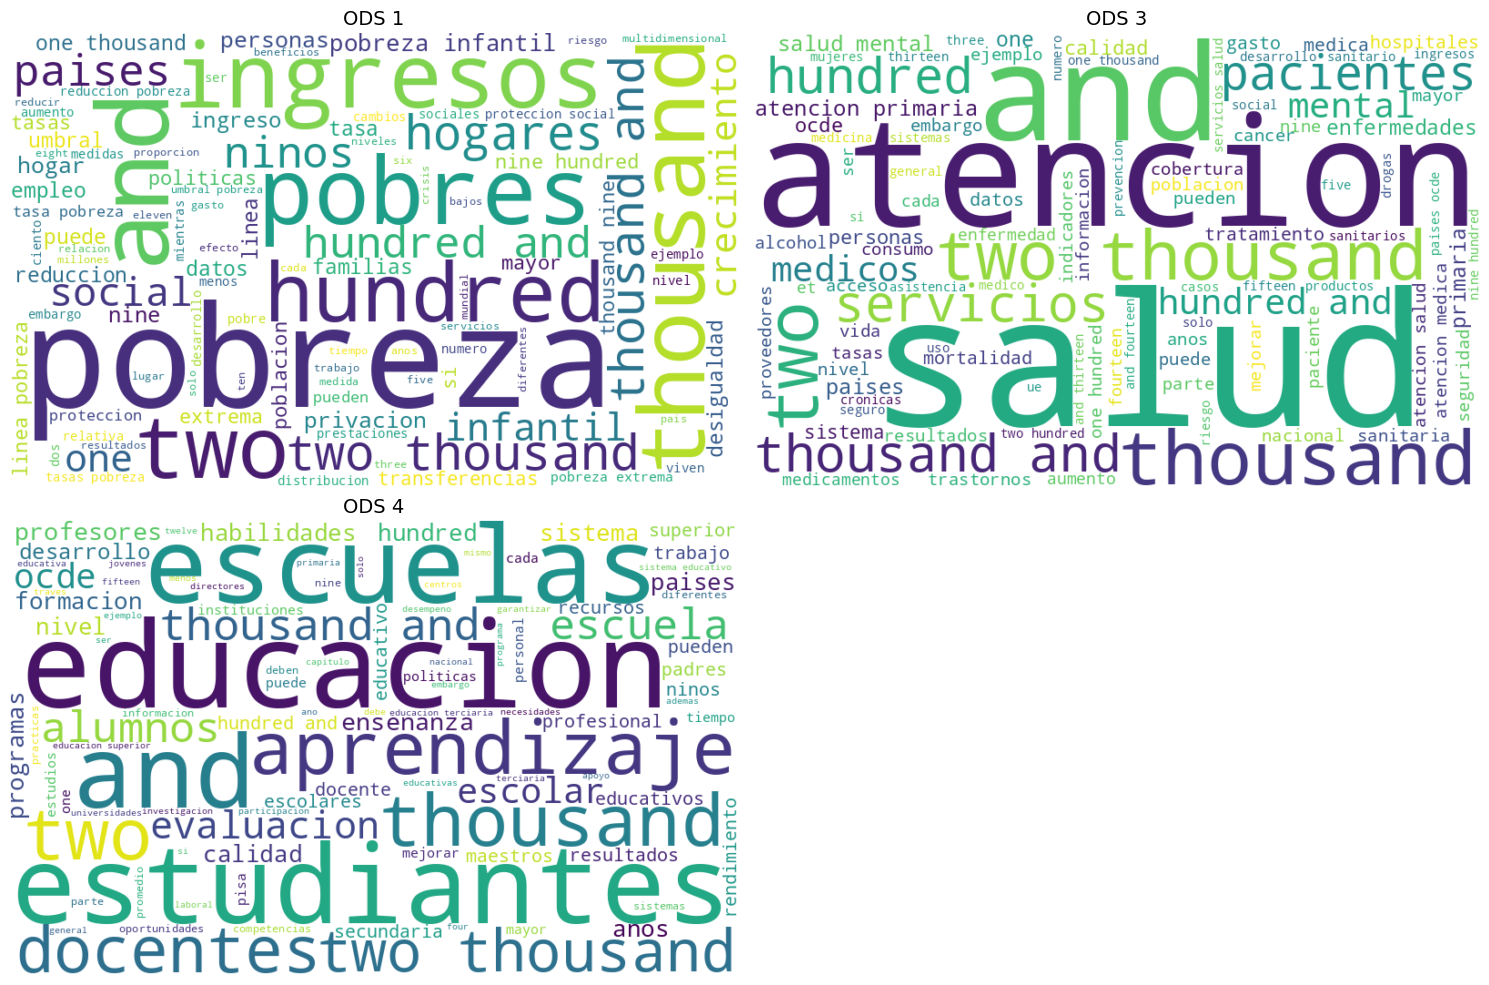

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Extraer el vectorizador TF-IDF del pipeline
vec = best_model.named_steps['vectorizer'].vectorizer
feature_names = np.array(vec.get_feature_names_out())

# Obtener la matriz TF-IDF del train con el MISMO preprocesamiento
Xtr_tfidf = best_model.named_steps['vectorizer'].transform(X_train)

# Clases únicas
classes = np.sort(y_train.unique())

# Nubes de palabras por clase
plt.figure(figsize=(15, 10))

for i, c in enumerate(classes, 1):
    # Filtrar filas del TF-IDF correspondientes a la clase c
    idx = np.where(y_train == c)[0]
    Xc = Xtr_tfidf[idx].toarray()

    # Promediar TF-IDF por palabra en esa clase
    tfidf_mean = Xc.mean(axis=0)


    word_weights = dict(zip(feature_names, tfidf_mean))

    # Generar nube de palabras
    wc = WordCloud(width=800, height=500, background_color="white",
                   colormap="viridis", max_words=100).generate_from_frequencies(word_weights)


    plt.subplot(2, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"ODS {c}", fontsize=14)
    plt.axis("off")

plt.tight_layout()
plt.show()



## 5.c) Descarga de Predicciones datos de Prueba Mejor Modelo
Usamos el modelo para predecir la clasificacion de los datos de prueba.Convertimos los resultados a un DataFrame. Realizamos esto para ver como estan quedando las predicciones, columna "Texto": el texto original, columna "Real": la etiqueta real,columna "Predicho": la etiqueta que predijo el modelo.
Exporta a Excel.

In [ ]:
# Cargar datos de prueba
df_prueba = pd.read_excel("Datos de prueba_proyecto.xlsx")

# Predecir con el pipeline ganador
X_prueba = df_prueba["Textos_espanol"]
y_pred_prueba = best_model.predict(X_prueba)

df_prueba["Predicho"] = y_pred_prueba.astype(int)  # asegurar tipo entero si las clases son 1/3/4

# Exportar a Excel
salida = "prediccionesRandomForest_prueba.xlsx"
df_prueba.to_excel(salida, index=False)
print(f"Archivo generado: {salida}")

Archivo generado: prediccionesRandomForest_prueba.xlsx
